This notebook optimises the hyperparameters of the best wavelet found in the previous notebook (event_generation_wholeeventDWT)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal
from scipy.signal import find_peaks, peak_widths
import pyabf
import pyabf.filter
from multiprocessing import Pool
import pywt

from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
from scipy.stats import randint

from matplotlib.ticker import MaxNLocator
import sklearn
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy.stats import entropy
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [28]:
import importlib
import all_funcs
importlib.reload(all_funcs)
from all_funcs import *

- context: I have a current vs time trace which I isolate nanoparticle translocation events, then I perform the wavelet transform to smooth the data, testing different thresholds. then I build an ML model and record the accuracy. I have done all of this already. now I want to find a balance between accuracy but also how closely the transformed events represent the original event (otherwise the original features are not preserved). how should I do this. can I come up with a metric?

In [8]:
labels_all_wavelet_merged_df_drop = unpickle('labels_all_wavelet_merged_df_drop.pkl')
new_df_flat_no1920_drop_wholeevent = unpickle('new_df_flat_no1920_drop_wholeevent.pkl')

In [4]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [5]:
def ML_all_wavelets_func(df, model):

    results = {}
    results_sd = {}
    
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    for column in df.columns:
        # Flatten and scale the features
        #features = df[column][0]
        scaler = RobustScaler()
        #scaler = StandardScaler()
        #X = scaler.fit_transform(features)
        # easy for when we remove the 1920 events
        #y = np.array(labels_df[column][0][:len(X)])
        X = np.array(df[column][0])
        y = y_labels_no1920
        # Initialize k-fold cross-validation
        
        X_scaled = scaler.fit_transform(X)

        # Create a pipeline with SMOTE and the specified model
        clf_pipeline = Pipeline([
            ('smote', SMOTE(random_state=42)),
            #('model', clone(model))
            ('model', model)
        ])

        # Perform k-fold CV
        accuracies = cross_val_score(clf_pipeline, X_scaled, y, cv=kf, scoring='accuracy', n_jobs=-1)  # Use parallel processing

        # Calculate average accuracy
        average_accuracy = np.mean(accuracies)
        sd_accuracy = np.std(accuracies)
        results[column] = average_accuracy
        results_sd[column] = sd_accuracy / np.sqrt(10) # standard error of the mean
    
    return results, results_sd

In [45]:
results_test, results_sd_test = ML_all_wavelets_func(results_all_wavelets_thresh015_coeff2_flat, XGBClassifier(random_state=42))

In [6]:
def ML_single(X, y, model):
    
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    scaler = RobustScaler()

    #X = np.array(df[column][0])
    #y = y_labels_no1920

    X_scaled = scaler.fit_transform(X)

    clf_pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        #('model', clone(model))
        ('model', model)
    ])

    # Perform k-fold CV
    accuracies = cross_val_score(clf_pipeline, X_scaled, y, cv=kf, scoring='accuracy', n_jobs=-1)  # Use parallel processing

    clf_pipeline.fit(X_scaled, y)
    # Calculate average accuracy
    average_accuracy = np.mean(accuracies)
    sd_accuracy = np.std(accuracies) / np.sqrt(10) # standard error of the mean
    
    return average_accuracy, sd_accuracy, clf_pipeline

In [5]:
results_all_wavelets_thresh01_coeff_flat = unpickle('results_all_wavelets_thresh01_coeff_flat.pkl')

In [6]:
results_all_wavelets_thresh01_coeff2_flat = unpickle('results_all_wavelets_thresh01_coeff2_flat.pkl')
results_all_wavelets_thresh02_coeff2_flat = unpickle('results_all_wavelets_thresh02_coeff2_flat.pkl')


In [7]:
results_all_wavelets_thresh005_coeff2_flat = unpickle('results_all_wavelets_thresh005_coeff2_flat.pkl')
results_all_wavelets_thresh01_coeff2_flat = unpickle('results_all_wavelets_thresh01_coeff2_flat.pkl')
results_all_wavelets_thresh015_coeff2_flat = unpickle('results_all_wavelets_thresh015_coeff2_flat.pkl')
results_all_wavelets_thresh02_coeff2_flat = unpickle('results_all_wavelets_thresh02_coeff2_flat.pkl')
results_all_wavelets_thresh025_coeff2_flat = unpickle('results_all_wavelets_thresh025_coeff2_flat.pkl')
results_all_wavelets_thresh03_coeff2_flat = unpickle('results_all_wavelets_thresh03_coeff2_flat.pkl')
results_all_wavelets_thresh035_coeff2_flat = unpickle('results_all_wavelets_thresh035_coeff2_flat.pkl')
results_all_wavelets_thresh04_coeff2_flat = unpickle('results_all_wavelets_thresh04_coeff2_flat.pkl')
results_all_wavelets_thresh045_coeff2_flat = unpickle('results_all_wavelets_thresh045_coeff2_flat.pkl')
results_all_wavelets_thresh05_coeff2_flat = unpickle('results_all_wavelets_thresh05_coeff2_flat.pkl')


In [34]:
results_all_wavelets_thresh015_coeff2_flat

,bior1.1,bior1.3,bior1.5,bior2.2,bior2.4,bior2.6,bior2.8,bior3.1,bior3.3,bior3.5,...,sym12,sym13,sym14,sym15,sym16,sym17,sym18,sym19,sym20,no_DWT
0,"[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...",...,"[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947...","[[70.84782893341436, -36.37763497192012, 1.947..."


In [10]:
y_labels_no1920 = unpickle('data_y_labels_no1920.pkl')

In [11]:
from skopt.space import Real, Integer, Categorical

In [12]:
from scipy.stats import randint, expon


In [ ]:
from joblib import dump

# Assuming best_model_XG_random_01_coif3 is your trained Pipeline object
dump(best_model_XG_random_015, 'best_model_XG_random_015.pkl')

NameError: name 'best_model_XG_random_015' is not defined

In [14]:
dump(best_model_XG_random_01_coif3, 'best_model_XG_random_01_coif3.pkl')


NameError: name 'best_model_XG_random_01_coif3' is not defined

In [11]:
dump(best_model_XG_random_01_coif6, 'best_model_XG_random_01_coif6.pkl')

['best_model_XG_random_01_coif6.pkl']

In [9]:
feature_names = ["$\Delta I_c$", "$\Delta I_r$", "$\Delta I_c$ / $\Delta I_r$", "dwell_time", "skew", "kurtosis", "total_area", "conductive_area", "resistive_area", "entropy", "mean", "std", "var", "rms", "max_deriv", "min_deriv", "sum_absolute_changes", "sign_changes_sum", "decay_time_lhs", "decay_time_rhs", "approx_mean", "approx_sd", "approx_energy", "spectral_entropy", "band_power"]


In [208]:
dump(best_model_XG_random_015, 'best_model_XG_random_015.pkl')


['best_model_XG_random_015.pkl']

In [26]:
def hyperparam_op_random(X):
    X_train, X_test, y_train, y_test = train_test_split(X, y_labels_no1920, test_size=0.2, random_state=42, stratify=y_labels_no1920)

    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)


    clf_pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('XG', XGBClassifier(random_state=42))
    ])

    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    params = {
        'XG__n_estimators': randint(700, 1000),
        'XG__max_depth': randint(16, 25),
        'XG__learning_rate': expon(scale=0.1),
        'XG__subsample': [0.7, 0.725, 0.75, 0.775, 0.8, 1.0],
        'XG__min_child_weight' : [ 6,7,8,9],
        'XG__gamma': [0.04, 0.05, 0.06, 0.07],
        'XG__colsample_bytree': [0.45,0.55,0.6,0.65,0.7]}

    search = RandomizedSearchCV(
        clf_pipeline,
        params,
        n_iter=60,
        cv=kf,
        scoring='accuracy',
        random_state=42
    )

    search.fit(X_train, y_train)
    accuracies = search.best_score_
    y_pred = cross_val_predict(search.best_estimator_, X_train, y_train, cv=kf)

    #average_accuracy = np.mean(accuracies)
    average_accuracy = search.cv_results_['mean_test_score'][search.best_index_]



    best_params = search.best_params_
    print(f"XG best params using random:", best_params)
    #print("Average CV accuracy:",average_accuracy, "\u00B1", np.std(accuracies))
    print(f"Average CV accuracy: {average_accuracy:.10f} ± {np.std(accuracies):.10f}")


    return X_train, X_test, y_train, y_test, y_pred, search, best_params, accuracies

- STD is a measure of spread
- can tell you a bit about many things: 


In [28]:
from joblib import dump

dump(best_model_XG_random_01_rbio15, 'best_model_XG_random_01_rbio15.pkl')

['best_model_XG_random_01_rbio15.pkl']

### Bior3.3 

In [74]:
# hyperparam_op
X_train_01_bior33, X_test_01_bior33, y_train_01_bior33, y_test_01_bior33, y_pred_01_bior33, search_01_bior33, best_params_01_bior33 = hyperparam_op(
    "XG", "random", results_all_wavelets_thresh01_coeff2_flat["bior3.3"][0], y_labels_no1920)


python(1174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


XG best params using random: {'XG__colsample_bytree': 0.3, 'XG__gamma': 0.1, 'XG__learning_rate': 0.05570576927486144, 'XG__max_depth': 15, 'XG__min_child_weight': 1, 'XG__n_estimators': 358, 'XG__subsample': 1.0}
Average CV accuracy: 0.9275814985492404 ± 0.0


In [300]:
len(y_labels_no1920[y_labels_no1920==0])

1038

In [81]:
# hyperparam_op
X_train_02_bior33, X_test_02_bior33, y_train_02_bior33, y_test_02_bior33, y_pred_02_bior33, search_02_bior33, best_params_02_bior33 = hyperparam_op(
    "XG", "random", results_all_wavelets_thresh02_coeff2_flat["bior3.3"][0], y_labels_no1920)


XG best params using random: {'XG__colsample_bytree': 0.6, 'XG__gamma': 0.3, 'XG__learning_rate': 0.1299280302274067, 'XG__max_depth': 17, 'XG__min_child_weight': 7, 'XG__n_estimators': 561, 'XG__subsample': 1.0}
Average CV accuracy: 0.9248186550605905 ± 0.0


In [29]:
# hyperparam_op
X_train_02_bior33, X_test_02_bior33, y_train_02_bior33, y_test_02_bior33, y_pred_02_bior33, search_02_bior33, best_params_02_bior33 = hyperparam_op(
    "XG", "random", results_all_wavelets_thresh02_coeff2_flat["bior3.3"][0], y_labels_no1920)

XG best params using random: {'XG__colsample_bytree': 0.6, 'XG__gamma': 0.3, 'XG__learning_rate': 0.1299280302274067, 'XG__max_depth': 17, 'XG__min_child_weight': 7, 'XG__n_estimators': 561, 'XG__subsample': 1.0}
Average CV accuracy: 0.9248186550605905 ± 0.0
Average CV accuracy: 0.9248186551 ± 0.0000000000


              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       830
         1.0       0.93      0.95      0.94      1338

    accuracy                           0.92      2168
   macro avg       0.92      0.92      0.92      2168
weighted avg       0.92      0.92      0.92      2168

Accuracy: 0.9248154981549815
Specificity: 0.891566265060241


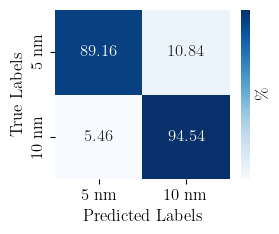

In [298]:
print(classification_report(y_train_02_bior33, y_pred_02_bior33))
print("Accuracy:", accuracy_score(y_train_02_bior33, y_pred_02_bior33))


cm_CV_XG_02_bior33 = confusion_matrix(y_train_02_bior33, y_pred_02_bior33)
cm_percentages_bior33 = cm_CV_XG_02_bior33 / cm_CV_XG_02_bior33.sum(axis=1)[:, np.newaxis]

tn, fp, fn, tp = cm_CV_XG_02_bior33.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

classes = ['5 nm', '10 nm']

plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages_bior33, annot=True, fmt=".2%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
#plt.savefig("MSci_python_images/XG_02_bior33_cm_percent.png", dpi=300)
plt.show()

- sensitivity = recall = $\frac{TP}{TP+FN}$
- specificity = true negative rate = $\frac{TN}{TN+FP}$
- precision = positive predictive value = $\frac{TP}{TP+FP}$

In [21]:

def classification_summary(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    report = classification_report(y_true, y_pred, labels=labels, output_dict=True)
    
    specificity_dict = {}
    for label in labels:
        # For each class, calculate TN and FP
        tn = cm.sum() - (cm[:, label].sum() + cm[label, :].sum() - cm[label, label])
        fp = cm[:, label].sum() - cm[label, label]
        specificity_dict[label] = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    summary_df = pd.DataFrame(report).transpose()
    specificity_series = pd.Series(specificity_dict, name='specificity')
    
    # Concatenate specificity with other metrics
    final_df = pd.concat([summary_df, specificity_series], axis=1)
    
    # Calculate macro-average specificity and add it to the DataFrame
    macro_avg_specificity = np.mean(list(specificity_dict.values()))
    final_df.at['macro avg', 'specificity'] = macro_avg_specificity
    final_df.at['weighted avg', 'specificity'] = np.nan  # Specificity doesn't have a weighted avg
    
    # Add accuracy to the DataFrame
    final_df.at['accuracy', 'specificity'] = np.nan  # Specificity isn't defined for overall accuracy
    
    return final_df


classification_summary_bior33_df = classification_summary(y_test_01_bior33, predictions_best_model_XG_01_bior33, [0,1])
print(classification_summary_bior33_df)


NameError: name 'y_test_01_bior33' is not defined

In [30]:
best_model_XG_random_02_bior33 = search_02_bior33.best_estimator_
predictions_best_model_XG_02_bior33 = best_model_XG_random_02_bior33.predict(X_test_02_bior33)

print(classification_report(y_test_02_bior33, predictions_best_model_XG_02_bior33))
print("Accuracy:", accuracy_score(y_test_02_bior33, predictions_best_model_XG_02_bior33))

y_proba = best_model_XG_random_02_bior33.predict_proba(X_test_02_bior33)  # Probabilities for each class
y_pred_uncertainty = 1 - np.max(y_proba, axis=1)  # Uncertainty = 1 - highest probability
y_pred_uncertainty


              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       208
         1.0       0.94      0.91      0.92       335

    accuracy                           0.91       543
   macro avg       0.90      0.91      0.90       543
weighted avg       0.91      0.91      0.91       543

Accuracy: 0.9079189686924494


array([0.4958, 0.0024, 0.0006, ..., 0.0031, 0.0007, 0.09  ], dtype=float32)

In [31]:
report = classification_report(y_train_02_bior33, y_pred_02_bior33, output_dict=True)

# Convert to DataFrame for further analysis
report_df = pd.DataFrame(report).transpose()

print("Detailed Classification Report:")
print(report_df)

Detailed Classification Report:
              precision    recall  f1-score      support
0.0            0.910209  0.891566  0.900791   830.000000
1.0            0.933579  0.945441  0.939473  1338.000000
accuracy       0.924815  0.924815  0.924815     0.924815
macro avg      0.921894  0.918504  0.920132  2168.000000
weighted avg   0.924632  0.924815  0.924664  2168.000000


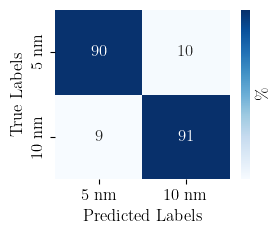

In [18]:
cm_best_model_XG_02_bior33 = confusion_matrix(y_test_02_bior33, predictions_best_model_XG_02_bior33)
cm_percentages = cm_best_model_XG_02_bior33 / cm_best_model_XG_02_bior33.sum(axis=1)[:, np.newaxis]

classes = ['5 nm', '10 nm']

plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages, annot=True, fmt=".0%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
plt.savefig("../MSci_python_images/XG_02_bior33_cm_percent_unseen.png", dpi=300)
#plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/XG_02_bior33_cm_percent_unseen.svg")

plt.show()

In [20]:
best_model_XG_random_02_bior33 = search_02_bior33.best_estimator_
predictions_best_model_XG_02_bior33 = best_model_XG_random_02_bior33.predict(X_test_02_bior33)

print(classification_report(y_test_02_bior33, predictions_best_model_XG_02_bior33))
print("Accuracy:", accuracy_score(y_test_02_bior33, predictions_best_model_XG_02_bior33))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       208
         1.0       0.94      0.91      0.92       335

    accuracy                           0.91       543
   macro avg       0.90      0.91      0.90       543
weighted avg       0.91      0.91      0.91       543

Accuracy: 0.9079189686924494


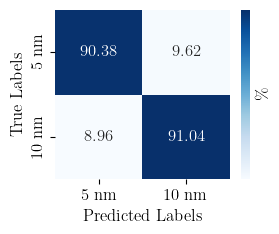

In [22]:
cm_best_model_XG_02_bior33 = confusion_matrix(y_test_02_bior33, predictions_best_model_XG_02_bior33)
cm_percentages = cm_best_model_XG_02_bior33 / cm_best_model_XG_02_bior33.sum(axis=1)[:, np.newaxis]

classes = ['5 nm', '10 nm']

plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages, annot=True, fmt=".1%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
#plt.savefig("MSci_python_images/XG_02_bior33_cm_percent_unseen.png", dpi=300)
plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/XG_02_bior33_cm_percent_unseen.svg")

plt.show()

In [35]:
feature_names = ["$\Delta I_c$", "$\Delta I_r$", "$\Delta I_c$ / $\Delta I_r$", "Dwell time", "skew", "kurtosis", "Total area", "Conductive area", "Resistive area", "Entropy", "Mean", "STD", "Variance", "RMS", "Max derivative", "Min derivative", "$\sum$ $\|$ derivative changes $\|$", "No. derviative sign changes", "Resistive decay time", "Conductive decay time", "Mean (approx)", "STD (approx)", "Energy (approx)", "Spectral entropy (approx)", "Band power (approx)"]

In [66]:
from joblib import load

best_model_XG_random_02_bior33 = load('best_model_XG_random_02_bior33.pkl')

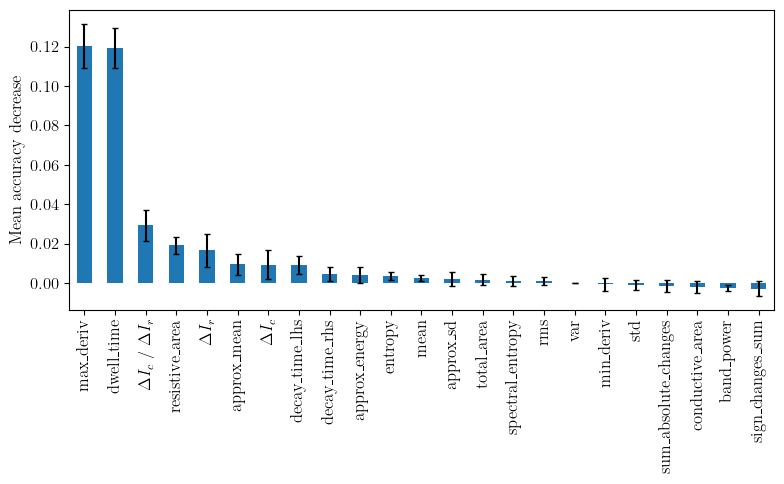

In [25]:
result = permutation_importance(best_model_XG_random_02_bior33, X_test_02_bior33, y_test_02_bior33, n_repeats=10, random_state=0, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances_sd = pd.Series(result.importances_std, index=feature_names)
forest_importances, forest_importances_sd = forest_importances.drop(["skew", "kurtosis"]), forest_importances_sd.drop(["skew", "kurtosis"])

sorted_idx = forest_importances.argsort()[::-1]

fig, ax = plt.subplots(figsize=(8, 5))
#forest_importances[sorted_idx].plot.bar(yerr=forest_importances_sd[sorted_idx], ax=ax, capsize=2)
forest_importances.iloc[sorted_idx].plot.bar(yerr=forest_importances_sd.iloc[sorted_idx], ax=ax, capsize=2)
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
#plt.savefig("MSci_python_images/feature_importance_XG_01_rbio15.png", dpi=300)
plt.show()

583402.81s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
583402.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


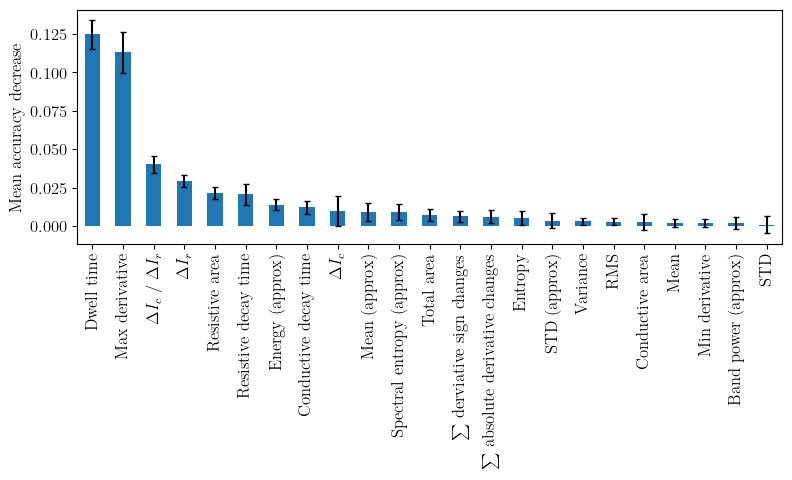

In [286]:
result = permutation_importance(best_model_XG_random_02_bior33, X_test_01_bior33, y_test_01_bior33, n_repeats=10, random_state=0, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances_sd = pd.Series(result.importances_std, index=feature_names)
forest_importances, forest_importances_sd = forest_importances.drop(["skew", "kurtosis"]), forest_importances_sd.drop(["skew", "kurtosis"])

sorted_idx = forest_importances.argsort()[::-1]

fig, ax = plt.subplots(figsize=(8, 5))
#forest_importances[sorted_idx].plot.bar(yerr=forest_importances_sd[sorted_idx], ax=ax, capsize=2)
forest_importances.iloc[sorted_idx].plot.bar(yerr=forest_importances_sd.iloc[sorted_idx], ax=ax, capsize=2)
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
#plt.savefig("MSci_python_images/feature_importance_XG_01_rbio15.png", dpi=300)
plt.show()

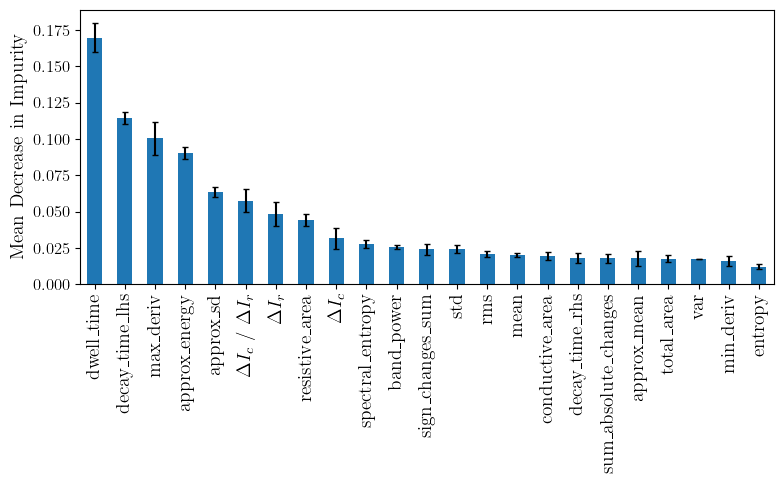

In [26]:
xgboost_model = best_model_XG_random_02_bior33.named_steps['XG']
importances_MDI = xgboost_model.feature_importances_
forest_importances = pd.Series(importances_MDI, index=feature_names)

# Assuming 'result.importances_std' contains the standard deviation of permutation importance
# Make sure this standard deviation is relevant or meaningful to display alongside MDI importances
forest_importances_sd = pd.Series(result.importances_std, index=feature_names)

forest_importances, forest_importances_sd = forest_importances.drop(["skew", "kurtosis"]), forest_importances_sd.drop(["skew", "kurtosis"])

# Sort the importances in descending order for plotting
sorted_idx = forest_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()  # Get current axis for plotting

# Plot MDI importances with error bars from permutation importance's standard deviation
forest_importances.iloc[sorted_idx].plot.bar(yerr=forest_importances_sd.iloc[sorted_idx], ax=ax, capsize=2)

for label in ax.get_xticklabels():
    label.set_fontsize(14)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=14)
plt.tight_layout()
#plt.savefig("MSci_python_images/feature_importance_MDI_XG_02_bior33_bigfont.png", dpi=300)
plt.show()

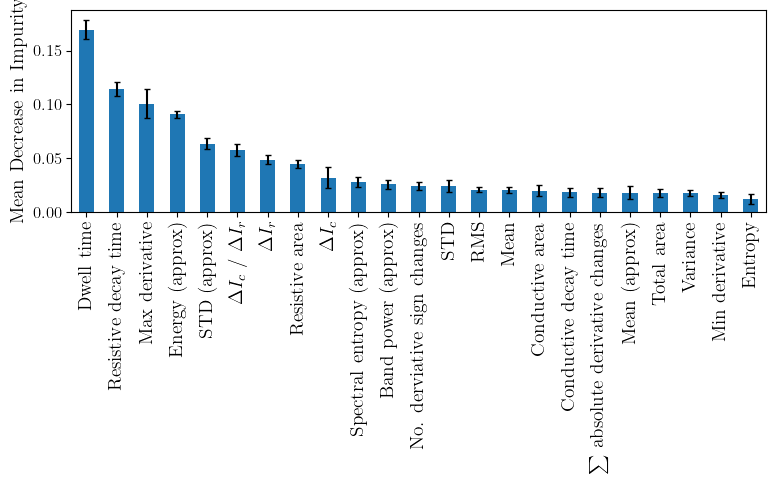

In [83]:
xgboost_model = best_model_XG_random_02_bior33.named_steps['XG']
importances_MDI = xgboost_model.feature_importances_
forest_importances = pd.Series(importances_MDI, index=feature_names)

# Assuming 'result.importances_std' contains the standard deviation of permutation importance
# Make sure this standard deviation is relevant or meaningful to display alongside MDI importances
forest_importances_sd = pd.Series(result.importances_std, index=feature_names)

forest_importances, forest_importances_sd = forest_importances.drop(["skew", "kurtosis"]), forest_importances_sd.drop(["skew", "kurtosis"])

# Sort the importances in descending order for plotting
sorted_idx = forest_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()  # Get current axis for plotting

# Plot MDI importances with error bars from permutation importance's standard deviation
forest_importances.iloc[sorted_idx].plot.bar(yerr=forest_importances_sd.iloc[sorted_idx], ax=ax, capsize=2)

for label in ax.get_xticklabels():
    label.set_fontsize(14)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=14)
plt.tight_layout()
#plt.savefig("MSci_python_images/feature_importance_MDI_XG_02_bior33_bigfont.png", dpi=300)
plt.show()

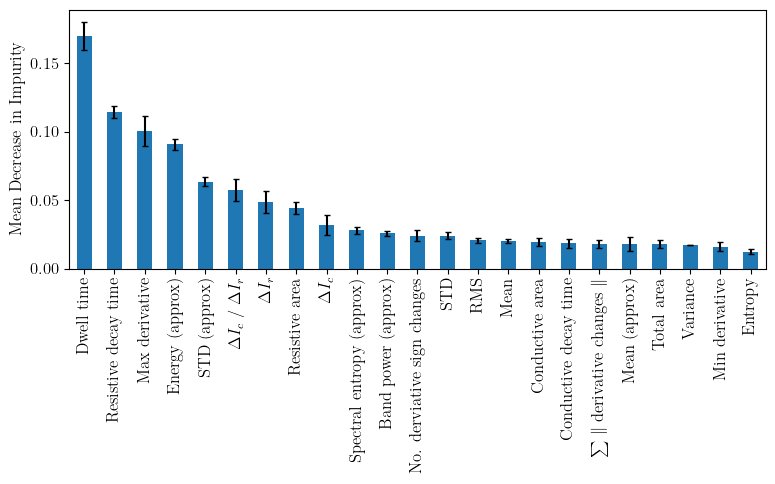

In [36]:
xgboost_model = best_model_XG_random_02_bior33.named_steps['XG']
importances_MDI = xgboost_model.feature_importances_
forest_importances = pd.Series(importances_MDI, index=feature_names)

# Assuming 'result.importances_std' contains the standard deviation of permutation importance
# Make sure this standard deviation is relevant or meaningful to display alongside MDI importances
forest_importances_sd = pd.Series(result.importances_std, index=feature_names)

forest_importances, forest_importances_sd = forest_importances.drop(["skew", "kurtosis"]), forest_importances_sd.drop(["skew", "kurtosis"])

# Sort the importances in descending order for plotting
sorted_idx = forest_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()  # Get current axis for plotting

# Plot MDI importances with error bars from permutation importance's standard deviation
forest_importances.iloc[sorted_idx].plot.bar(yerr=forest_importances_sd.iloc[sorted_idx], ax=ax, capsize=2)

ax.set_ylabel("Mean Decrease in Impurity")
plt.tight_layout()
#plt.savefig("MSci_python_images/feature_importance_MDI_XG_02_bior33.png", dpi=500)
plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/feature_importance_MDI_XG_02_bior33.svg")

plt.show()

python(1375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


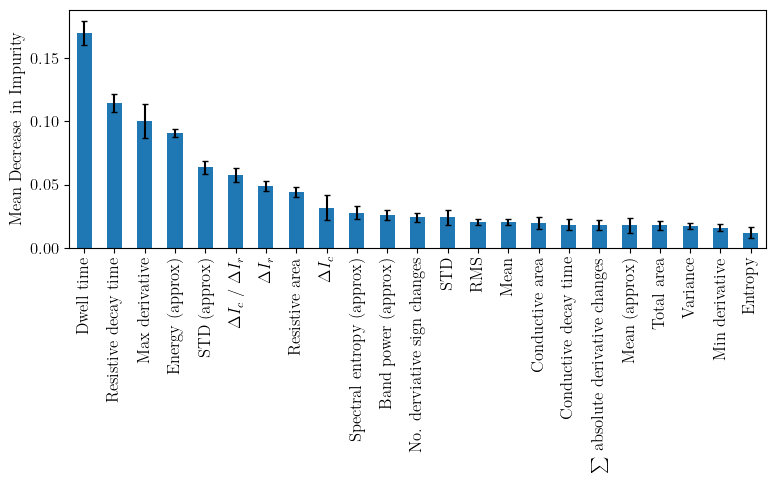

In [78]:
xgboost_model = best_model_XG_random_02_bior33.named_steps['XG']
importances_MDI = xgboost_model.feature_importances_
forest_importances = pd.Series(importances_MDI, index=feature_names)

# Assuming 'result.importances_std' contains the standard deviation of permutation importance
# Make sure this standard deviation is relevant or meaningful to display alongside MDI importances
forest_importances_sd = pd.Series(result.importances_std, index=feature_names)

forest_importances, forest_importances_sd = forest_importances.drop(["skew", "kurtosis"]), forest_importances_sd.drop(["skew", "kurtosis"])

# Sort the importances in descending order for plotting
sorted_idx = forest_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()  # Get current axis for plotting

# Plot MDI importances with error bars from permutation importance's standard deviation
forest_importances.iloc[sorted_idx].plot.bar(yerr=forest_importances_sd.iloc[sorted_idx], ax=ax, capsize=2)

ax.set_ylabel("Mean Decrease in Impurity")
plt.tight_layout()
#plt.savefig("MSci_python_images/feature_importance_MDI_XG_02_bior33.png", dpi=500)
plt.show()

In [221]:
dump(best_model_XG_random_01_bior33, 'best_model_XG_random_01_bior33.pkl')

['best_model_XG_random_01_bior33.pkl']

In [288]:
dump(best_model_XG_random_02_bior33, 'best_model_XG_random_02_bior33.pkl')

['best_model_XG_random_02_bior33.pkl']

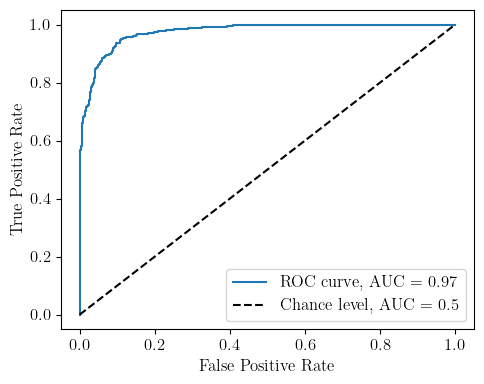

In [297]:
probabilities_02_bior33 = cross_val_predict(search_02_bior33.best_estimator_, X_train_02_bior33, y_train_02_bior33, cv=kf, method='predict_proba')[:,1]
plt.figure(figsize=(5, 4))

fpr, tpr, thresholds = roc_curve(y_train_02_bior33, probabilities_02_bior33)
auc_01rbio15 = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC curve, AUC = {auc_01rbio15:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Chance level, AUC = 0.5')  # Diagonal dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
#plt.savefig("MSci_python_images/ROC_XG_02_bior33.png", dpi=300)
plt.show()

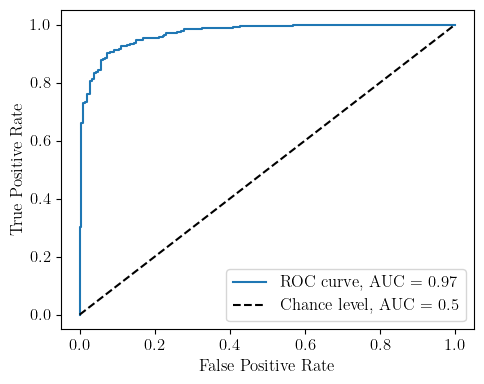

In [296]:
# on the unseen data

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(5, 4))

probabilities_02_bior33 = search_02_bior33.best_estimator_.predict_proba(X_test_02_bior33)[:, 1]
auc_01rbio15 = roc_auc_score(y_test_02_bior33, probabilities_02_bior33)

fpr, tpr, thresholds = roc_curve(y_test_02_bior33, probabilities_02_bior33)
plt.plot(fpr, tpr, label=f"ROC curve, AUC = {auc_01rbio15:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Chance level, AUC = 0.5')  # Diagonal dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
#plt.savefig("MSci_python_images/ROC_XG_02_bior33_unseen.png", dpi=300)
plt.show()

##### Looking at best wavelet events

In [10]:
event_times_all_wavelets = unpickle("data_1_to_20_df3.pkl")["event_time"]
event_datas_all_wavelets = unpickle("data_1_to_20_df3.pkl")["event_data"]
mean_noises_all_wavelets = unpickle("data_1_to_20_df3.pkl")["mean_noise"]
sd_thresholds_all_wavelets = unpickle("data_1_to_20_df3.pkl")["sd_threshold"]
sd_thresholds_lower_all_wavelets = unpickle("data_1_to_20_df3.pkl")["sd_threshold_lower"]

NP_sizes_all_wavelets = [5,5,5,5,5,5,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]

In [11]:
df_events_all_wavelets_thresh01_coeff2 = unpickle('df_events_all_wavelets_thresh01_coeff2.pkl')
df_events_all_wavelets_thresh015_coeff2 = unpickle('df_events_all_wavelets_thresh015_coeff2.pkl')
df_events_all_wavelets_thresh02_coeff2 = unpickle('df_events_all_wavelets_thresh02_coeff2.pkl')
df_events_all_wavelets_thresh025_coeff2 = unpickle('df_events_all_wavelets_thresh025_coeff2.pkl')
df_events_all_wavelets_thresh03_coeff2 = unpickle('df_events_all_wavelets_thresh03_coeff2.pkl')
df_events_all_wavelets_thresh035_coeff2 = unpickle('df_events_all_wavelets_thresh035_coeff2.pkl')
df_events_all_wavelets_thresh04_coeff2 = unpickle('df_events_all_wavelets_thresh04_coeff2.pkl')
df_events_all_wavelets_thresh045_coeff2 = unpickle('df_events_all_wavelets_thresh045_coeff2.pkl')
df_events_all_wavelets_thresh05_coeff2 = unpickle('df_events_all_wavelets_thresh05_coeff2.pkl')

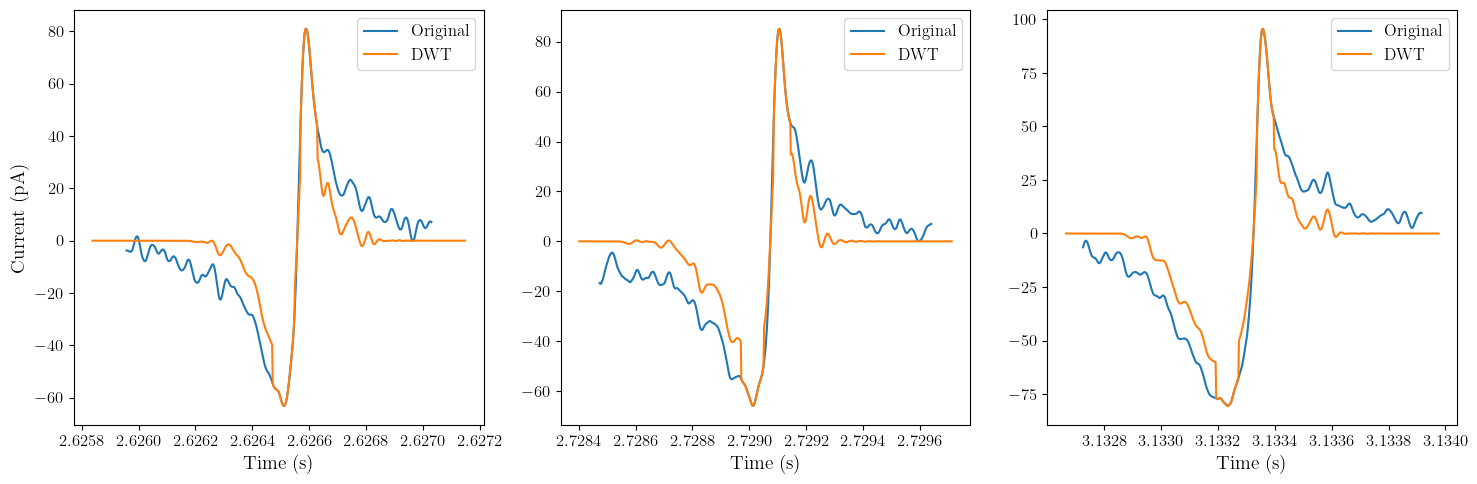

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 3 rows, 4 cols

axs = axs.flatten()

for i, ax in zip([3,4,5], axs):
    # Example plot commands for each subplot
    # Plotting the first element as an example, replace indices as needed
    ax.plot(event_times_all_wavelets[0][i], event_datas_all_wavelets[0][i], label='Original')
    ax.plot(df_events_all_wavelets_thresh05_coeff2["db30"][0][0][i], df_events_all_wavelets_thresh05_coeff2["db30"][1][0][i], label='DWT')
    if i ==3:
        ax.set_ylabel("Current (pA)", fontsize=14)
    
    ax.set_xlabel("Time (s)", fontsize=14)
    
    ax.legend()

plt.tight_layout()
#plt.savefig("MSci_python_images/thresh05_db30_events.png", dpi=500)
plt.show()

In [45]:

rolled_cur = np.roll(event_datas_all_wavelets[0][3], -20, axis=0)
rolled_dwt = np.roll(df_events_all_wavelets_thresh02_coeff2["bior3.3"][1][0][3], -20)

python(98744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(98752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


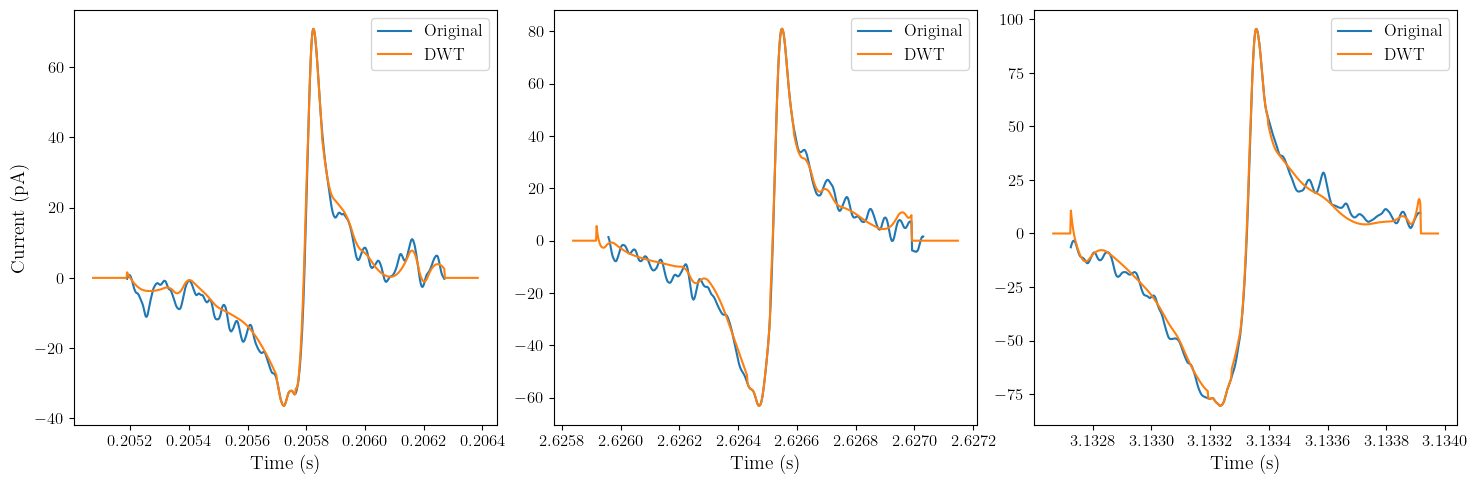

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 3 rows, 4 cols

axs = axs.flatten()

for i, ax in zip([0,3,5], axs):
    wavelet = "bior3.3"
    # Example plot commands for each subplot
    # Plotting the first element as an example, replace indices as needed
    if i == 3:
        ax.plot(event_times_all_wavelets[0][i], rolled_cur, label='Original')
        ax.plot(df_events_all_wavelets_thresh02_coeff2[wavelet][0][0][i], rolled_dwt, label='DWT')
    else:
        ax.plot(event_times_all_wavelets[0][i], event_datas_all_wavelets[0][i], label='Original')
        ax.plot(df_events_all_wavelets_thresh02_coeff2[wavelet][0][0][i], df_events_all_wavelets_thresh02_coeff2[wavelet][1][0][i], label='DWT')
    if i ==0:
        ax.set_ylabel("Current (pA)", fontsize=14)
    
    ax.set_xlabel("Time (s)", fontsize=14)
    
    ax.legend()

plt.tight_layout()
#plt.savefig("MSci_python_images/thresh02_bior33_events.png", dpi=500)
plt.show()

In [ ]:
results_all_wavelets_thresh03_coeff2_flat["db15"][0]

In [196]:
df_events_all_wavelets_thresh03_coeff2 = unpickle('df_events_all_wavelets_thresh03_coeff2.pkl')

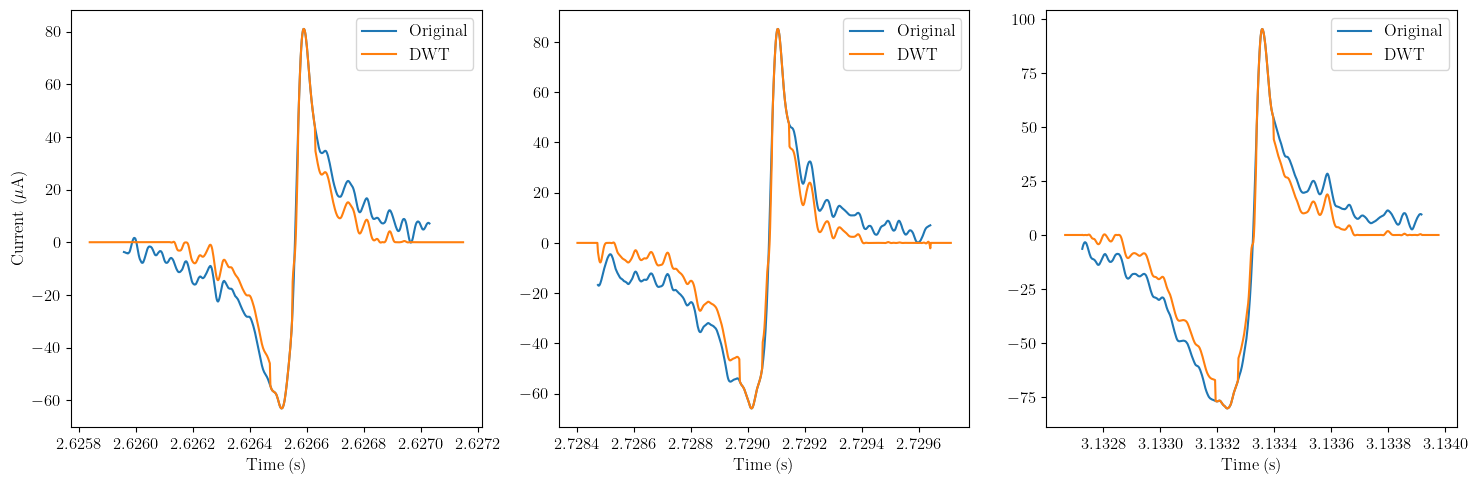

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 3 rows, 4 cols

axs = axs.flatten()

for i, ax in zip([3,4,5], axs):
    # Example plot commands for each subplot
    # Plotting the first element as an example, replace indices as needed
    ax.plot(event_times_all_wavelets[0][i], event_datas_all_wavelets[0][i], label='Original Event')
    ax.plot(df_events_all_wavelets_thresh02_coeff2["coif14"][0][0][i], df_events_all_wavelets_thresh02_coeff2["coif14"][1][0][i], label='DWT Event')
    if i ==3:
        ax.set_ylabel("Current ($\mu$A)")
    
    ax.set_xlabel("Time (s)")
    
    ax.legend()

plt.tight_layout()
#plt.savefig("MSci_python_images/thresh05_db30_events.png", dpi=300)
plt.show()

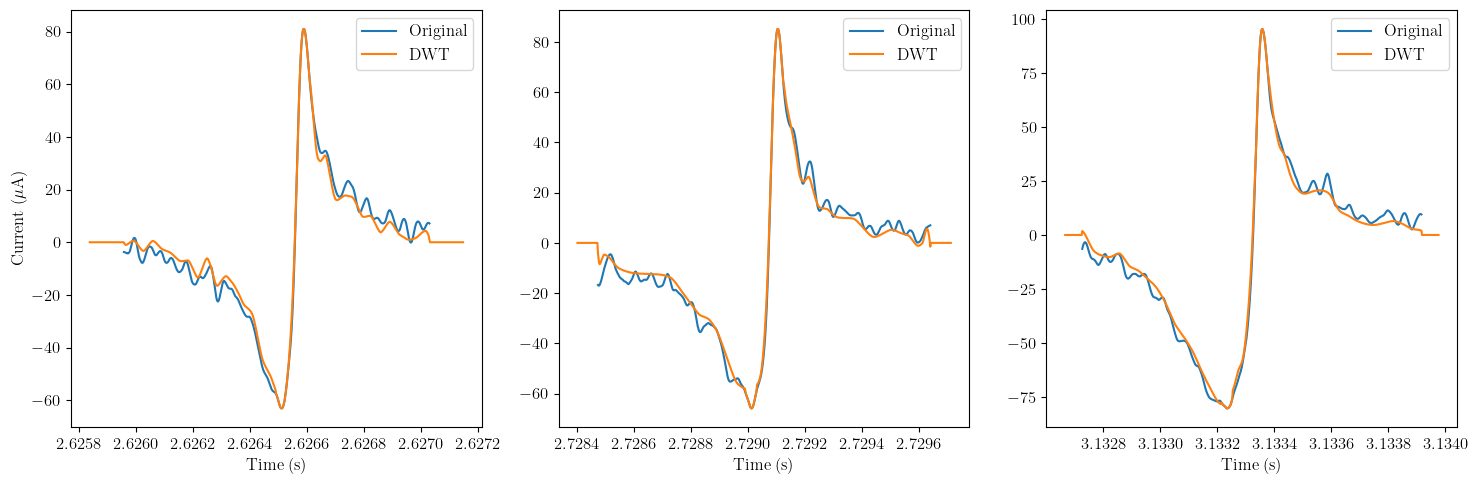

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 3 rows, 4 cols

axs = axs.flatten()

for i, ax in zip([3,4,5], axs):
    # Example plot commands for each subplot
    # Plotting the first element as an example, replace indices as needed
    ax.plot(event_times_all_wavelets[0][i], event_datas_all_wavelets[0][i], label='Original')
    ax.plot(df_events_all_wavelets_thresh015_coeff2["coif3"][0][0][i], df_events_all_wavelets_thresh015_coeff2["coif3"][1][0][i], label='DWT')
    if i ==3:
        ax.set_ylabel("Current ($\mu$A)")
    
    ax.set_xlabel("Time (s)")
    
    ax.legend()

plt.tight_layout()
#plt.savefig("MSci_python_images/thresh015_coif3_events.png", dpi=300)
plt.show()

In [113]:
len(event_datas_all_wavelets[0][0])

541

In [110]:
rec_test, coeff_test = lowpassfilter_all(event_datas_all_wavelets[0][0], thresh = 0.1, wavelet = "coif3")

##### Plotting wavelet
Wavelet function $\psi(t)$:
- used to capture the details of the signal (high frequency components)
- wavlets are scaled and translated versions of the mother wavelet whcih allows them to be adapted to different levels of detail in the signal data $\rightarrow$ this makes wavelet analysis especially powerful for analysing phenomena that have discontinuities and sharp spikes  

Scaling function $\phi(t)$:
- used to capture the the aproximate trends in the signal (low frequency components)
- scaling func is used to construct the apprixmation coefficients in wavlet decomposition
- related to the wavelet function through a set of equations known as the dilatin equationor two-scale relation

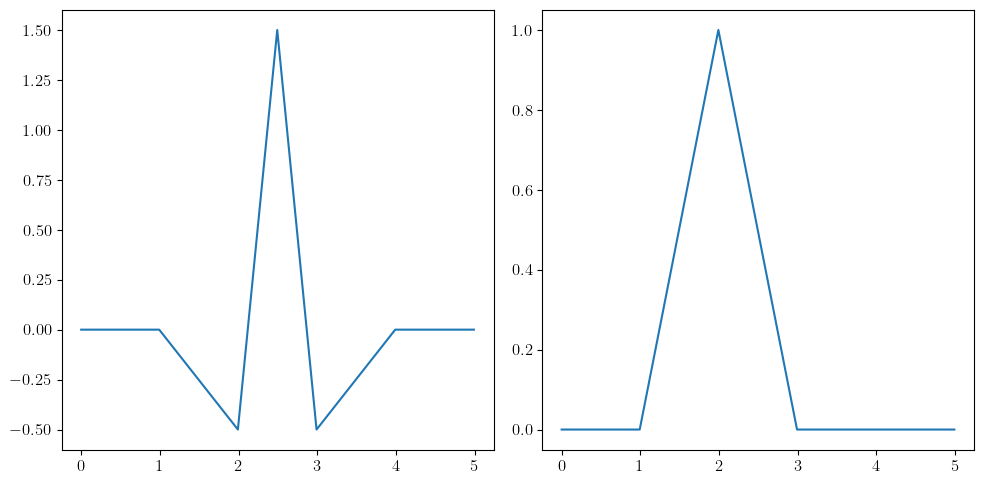

In [4]:
wavelets = pywt.wavelist(kind='discrete')
wavelet = "bior2.2"
w = pywt.Wavelet(wavelet)

# Get the maximum level of decomposition
max_level = pywt.dwt_max_level(data_len=1000, filter_len=w.dec_len)

# Generate the wavelet function (psi) and scaling function (phi) at the maximum level of decomposition
phi, psi, x = w.wavefun(level=max_level)[2:]
#phi, psi, x = w.wavefun(level=max_level)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the wavelet function (psi)
ax[0].plot(x, psi)#, label=f'{wavelet} Wavelet Function ($\psi$)')

# Plot the scaling function (phi)
ax[1].plot(x, phi)#, label=f'{wavelet} Scaling Function ($\phi$)')

plt.tight_layout()
plt.show()